# Intro to EOFs

## What are EOFs?
"Empirical Orthogonal Function" (EOF) analysis is the name climate scientists use for "principal component analysis" (PCA). Intuitively, EOFs are the dominant spatial patterns in the data (we'll get to the precise mathematical definition of "dominant pattern" soon). They are "empirical" because they're estimated from data and "orthogonal" because each pattern identified in the analysis is required to be orthogonal to every other pattern (i.e., any two patterns have a spatial correlation of zero). Why use them? From a climate variability perspective, it can be helpful to think of the climate system having preferred "modes" of variability; in other words, preferred patterns of oscillation when perturbed. A popular application of EOF analysis is to identify these "modes" of variability.

### A visual demonstration
Before explaining the math, let's look at a visual example. We'll start by generating some data.

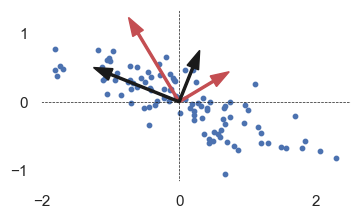

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## set plotting preferences and instantiate RNG
sns.set(rc={"axes.facecolor": "white", "axes.grid": False})
rng = np.random.default_rng()

## generate some data
n = 100  # number of samples
x = rng.normal(size=n)
y = -0.4 * x + 0.25 * rng.normal(size=n)

## plot the results
fig, ax = plt.subplots(figsize=(4, 3))

## add data
ax.scatter(x, y, s=10)

## plot some vectors
arrow_kwargs = dict(x=0, y=0, width=0.03, head_width=0.18)
ax.arrow(dx=-0.6, dy=1, color="r", **arrow_kwargs)
ax.arrow(dx=0.5, dy=0.3, color="r", **arrow_kwargs)
ax.arrow(dx=-1, dy=0.4, color="k", **arrow_kwargs)
ax.arrow(dx=0.2, dy=0.5, color="k", **arrow_kwargs)

## plot axes
ax.axvline(0, c="k", ls="--", lw=0.5)
ax.axhline(0, c="k", ls="--", lw=0.5)

## label plot
ax.set_aspect("equal")
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-1, 0, 1])
plt.show()

I've plotted two possible sets of orthogonal vectors, one in black and one in red. Which aligns "better" with the data? Intuitively, you might say the black set: the longer arrow seems to be aligned along the main axis of the data. This is exactly the goal of EOFs: to find the "direction" or "pattern" which "aligns best" with the data. In this 2-D case (we only have two coordinates) the pattern is a 2-D vector. If we had 3 coordinates, the vector would have 3-coordinates, and so on. If we have temperature data with coordiantes of $n_{lat}$ latitude points and $n_{lon}$ longitude points, the resulting vector will be $(n_{lon}\times n_{lat})$ elements long; if we reshape this vector back into an array with dimensions of $(n_{lon}, n_{lat})$, then we get a spatial pattern.

## Math behind EOFs

Consider a set of $n$, $m$-dimensional vectors, concatenated into a data matrix $\mathbf{X}$:
\begin{align}
    \mathbf{X} &= \begin{bmatrix} \mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_n \end{bmatrix}
\end{align}

### What do we mean by "dominant pattern"?
Let's consider two equivalent definitions

#### Definition 1: maximizing variance of the projected data
We want to find the "dominant" $m$-dimensional pattern $\mathbf{p}$. Mathematically, we define "dominant pattern" as the vector of length 1 whose projection onto the data yields the largest variance in time. In more detail:
1. First, note that the "projection" of a data sample $\mathbf{x}_i$ onto the pattern is the dot product $\mathbf{p}\cdot\mathbf{x}_i$ (or equivalently, in matrix form, $\mathbf{p}^T\mathbf{x}_i$). Intuitively, the projection is the "similarity" between the pattern and the sample. A high value indicates a strong positive correlation, a low value indicates a strong negative correlation, and a value close to zero indicates a weak correlation. Note we can actually compute the pattern correlation explicitly as $\text{corr}(\mathbf{p},\mathbf{x}_i) = \frac{\mathbf{p}\cdot\mathbf{x}_i}{\sqrt{\left(\mathbf{p}\cdot\mathbf{p}\right) \left(\mathbf{x_i}\cdot\mathbf{x}_i\right)}}$.
2. Then we can write the projection of each datapoint onto the pattern as: $\mathbf{q}^T = \mathbf{p}^T\mathbf{X}$. Note that this projection vector, $\mathbf{q}^T$, is a $1\times n$ row vector, with a single entry for each of the $n$ samples (columns) in the dataset.
3. The variance of the projected dataset is given by $\text{var}(\mathbf{q}) = \frac{1}{n}\mathbf{q}^T\mathbf{q}=\mathbf{p}^T\mathbf{X}\mathbf{X}^T\mathbf{p}$. Note that the $m\times m$ matrix $\mathbf{C}_{xx}\equiv \frac{1}{n}\mathbf{XX}^T$ is the covariance matrix of the data! Rewriting the variance in terms of this matrix, we have: $\text{var}(\mathbf{q})= \mathbf{p}^T\mathbf{C}_{xx}\mathbf{p}$.
4. Finally, define the leading EOF as the vector $\hat{\mathbf{p}}$ which maximizes the variance of $\mathbf{q}$ subject to the constraint that $||\hat{\mathbf{p}}||=1$.

#### View 2: minimizing error of the reconstructed data

### How to find the dominant pattern?

We want to choose the pattern $\mathbf{p}$ which maximizes $\mathbf{p}^T\mathbf{C}_{xx}\mathbf{p}$ subject to the constraint $||\mathbf{p}||=\mathbf{p}^T\mathbf{p}=1$. We can solve for this $\mathbf{p}$ using a [Lagrange multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier). Defining the Lagrange multiplier as $\mu$, write down an "augmented" cost function:
\begin{align}
    \mathcal{L}(\mathbf{p}, \mu) &= \mathbf{p}^T\mathbf{C}_{xx}\mathbf{p} + \mu \left(1-\mathbf{p}^T\mathbf{p}\right).
\end{align}
The first term on the LHS is the original cost function and the second term is the constraint term. Computing the gradient of the augmented cost function with respect to $\mathbf{p}$ we have:
\begin{align}
    \frac{\partial \mathcal{L}}{\partial \mathbf{p}} &= \mathbf{C}_{xx} \mathbf{p} - \mu \mathbf{p}
\end{align}
Setting this gradient to zero, we find:
\begin{align}
    \mathbf{C}_{xx} \mathbf{p} &= \mu \mathbf{p}.
\end{align}

(note that setting $\frac{\partial \mathcal{L}}{\partial\mu}=1-\mathbf{p}^T\mathbf{p}:=0$ yields the original constraint, $\mathbf{p}^T\mathbf{p}=1$). Note that to satisfy the equation above, $\mathbf{p}$ must be an eigenvector of $\mathbf{C}_{xx}$ (and has corresponding eigenvalue $\mu$). Note that if $\mathbf{p}$ is an eigenvector with eigenvalue $\mu$ and length 1, then we have $\mathbf{p}^T\mathbf{C}_{xx}\mathbf{p} = \mathbf{p}^T\left(\mu\mathbf{p}\right)=\mu$. Therefore, the pattern which maximizes $\mathbf{p}^T\mathbf{C}_{xx}\mathbf{p}$ is the eigenvector of $\mathbf{C}_{xx}$ with the largest eigenvalue.

#### Connection to SVD

Before explaining how to compute the projection timeseries and explained variance of each pattern, let's look at the connection between the eigenvectors of $\mathbf{C}_{xx}$ and the singular value decomposition (SVD) of $\mathbf{X}$. Let's start by writing $\mathbf{X}$ in terms of its singular value decomposition:
\begin{align}
    \mathbf{X}&=\mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^T,
\end{align}
Then the covariance matrix can be written as:
\begin{align}
    \mathbf{C}_{xx} &=\mathbf{XX}^T\\
    &= \left(\mathbf{U}\boldsymbol{\Lambda} \mathbf{V}^T\right)\left(\mathbf{V} \boldsymbol{\Lambda} \mathbf{U}^T\right)\\
    &= \mathbf{U}\boldsymbol{\Lambda}^2\mathbf{U}^T
\end{align}
Where we used the property of orthogonal matrices $\mathbf{V}^T\mathbf{V}=\mathbf{I}$. Next, right-multiply by $\mathbf{U}$:
\begin{align}
    \mathbf{C}_{xx}\mathbf{U} &= \mathbf{U}\boldsymbol{\Lambda}^2
\end{align}
Therefore, the left singular vectors of $\mathbf{X}$ are eigenvectors of $\mathbf{C}_{xx}$. In particular, the $i^{th}$ left singular vector satisfies the eigenvector equation $\mathbf{C}_{xx}\mathbf{u}_i = \lambda_i^2\mathbf{u}_i$. 

### Projection timeseries and explained variance

The principal component timeseries is given by projecting the data onto the pattern: 
\begin{align}
    \mathbf{q}_i^T &= \mathbf{p}_i^T\mathbf{X}
\end{align}
Setting $\mathbf{p}_i$ to the $i^{th}$ singular vector of $\mathbf{X}$, we have:
\begin{align}
    \mathbf{q}_i^T &=\mathbf{u}_i^T\mathbf{X}\\
    &= \mathbf{u}_i^T\left(\mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^T\right)\\
    &=\sum_{j}\mathbf{u}_i\mathbf{u}_j\lambda_j\mathbf{v}_j^T\\
    &= \lambda_i\mathbf{v}_i^T,
\end{align}
where the last equality comes from noticing that $\mathbf{u}_i^T\mathbf{u}_j=1$ if $i=j$ and 0 otherwise. That is, the projection of the data onto the pattern is given by the right singular vectors, scaled by the singular values. Note that the variance of the data's projection onto $\mathbf{u}_i$ is then given by:
\begin{align}
    \text{var}(\mathbf{q}_i) &= \left(\lambda_i\mathbf{v}_i^T\right)\left(\lambda_i\mathbf{v}_i^T\right)^T\\
    &=\lambda_i^2\mathbf{v}_i^T\mathbf{v}_i\\
    &=\lambda_i^2,
\end{align}
and the fraction of variance explained by the $i^{th}$ singular vector is given by:
\begin{align}
    \frac{\text{var}(\mathbf{q}_i)}{\sum_j \text{var}(\mathbf{q}_j)} &= \frac{\lambda_i^2}{\sum_j\lambda_j^2}
\end{align}

**In summary,** if we write $\mathbf{X}$ in terms of its SVD as $\mathbf{X}=\mathbf{USV}^T$, we have:
- The columns of $\mathbf{U}$ are the EOFs (spatial patterns)
- The columns of $\mathbf{V}$ (or rows of $\mathbf{V}^T$) are the corresponding timeseries
- The fraction of total variance explained by the data's projection onto the $i^{th}$ EOF is given by $\frac{\lambda_i^2}{\sum_j \lambda_j^2}$

## Examples with real data

Here we'll use the ```xeofs``` package to compute EOFs (rather than doing the SVD manually).

First, some functions to load, detrend, and plot the data

In [2]:
import pathlib
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cmocean


def trim(data):
    """trim to lon/lat range"""

    ## subset data in space (and downsample to 1-deg res.)
    data_trimmed = data.sel(longitude=slice(280, 360, 4), latitude=slice(80, 20, 4))

    ## get winter means
    data_trimmed_winter = (
        slp.resample(time="QS-DEC").mean().isel(time=slice(None, None, 4))
    )

    return data_trimmed_winter


def load_data(server_fp=None):
    """Load data from local directory if available; otherwise from server"""

    ## filepath for saving data locally
    save_fp = pathlib.Path("./slp_data.nc")

    ## check if data is saved locally
    if save_fp.is_file():

        data = xr.open_dataset("slp_data.nc")

    else:

        ## filepath of ERA5 data on server
        fp_on_server = pathlib.Path(
            "cmip6/data/era5/reanalysis/single-levels/monthly-means/mean_sea_level_pressure"
        )

        ## get full filepath
        fp = pathlib.Path(server_fp) / fp_on_server

        ## open data
        data = xr.open_mfdataset(fp.glob("*.nc"))

        ## trim data
        data = trim(data)

        ## save to file
        data.to_netcdf(save_fp)

    ## convert data from Pa to hPa
    hPa_per_Pa = 1 / 100
    data_hPa = data * hPa_per_Pa

    return data_hPa["msl"]


def get_trend_coefs(data, dim="time", deg=1):
    """get coefficients for trend"""
    return data.polyfit(dim=dim, deg=deg)["polyfit_coefficients"]


def get_trend(data, dim="time", deg=1):
    """
    Get trend for an xr.dataarray along specified dimension,
    by fitting polynomial of degree 'deg'.
    """

    ## Get coefficients for best fit
    polyfit_coefs = get_trend_coefs(data=data, dim=dim, deg=deg)

    ## Get best fit line (linear trend in this case)
    trend = xr.polyval(data[dim], polyfit_coefs)

    return trend


def detrend(data, dim="time", deg=1):
    """
    Remove trend of degree 'deg' from data, along dimension 'dim'.
    """

    return data - get_trend(data, dim=dim, deg=deg)


def plot_setup(fig, projection, lon_range, lat_range, xticks=None, yticks=None):
    """Add a subplot to the figure with the given map projection
    and lon/lat range. Returns an Axes object."""

    ## increase resolution for projection
    ## (otherwise lines plotted on surface won't follow curved trajectories)
    projection.threshold /= 1000

    ## Create subplot with given projection
    ax = fig.add_subplot(projection=projection)

    ## Subset to given region
    extent = [*lon_range, *lat_range]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    ## draw coastlines
    ax.coastlines(linewidths=0.5)

    ## add tick labels
    if xticks is not None:

        ## add lon/lat labels
        gl = ax.gridlines(
            draw_labels=True,
            linestyle="-",
            alpha=0.1,
            linewidth=0.5,
            color="k",
            zorder=1.05,
        )

        ## specify which axes to label
        gl.top_labels = False
        gl.right_labels = False

        ## specify ticks
        gl.ylocator = mticker.FixedLocator(yticks)
        gl.xlocator = mticker.FixedLocator(xticks)

    return ax


def plot_setup_atlantic(fig):
    """Plot Atlantic region"""

    ## adjust figure size
    fig.set_size_inches(5, 3)

    ## specify map projection
    proj = ccrs.Orthographic(central_longitude=-40, central_latitude=50)

    ## get ax object
    ax = plot_setup(
        fig,
        proj,
        lon_range=[200, 360],
        lat_range=[20, 80],
        xticks=[150, -160, -110],
        yticks=[-20, 0, 20],
    )

    return fig, ax

Now, load the data and compute anomalies

In [3]:
## load all data and detrend
slp = load_data(server_fp="/Volumes")
slp_anom = detrend(slp)

### 2-D example

Let's look at the SLP anomalies near Iceland and the Azores

In [4]:
import xeofs as xe
import pandas as pd

## get SLP over iceland and azores
slp_ice = slp_anom.interp(longitude=342.5, latitude=65)
slp_azo = slp_anom.interp(longitude=332, latitude=38.5)

## put iceland/azores data in single array
slp_2d = xr.concat([slp_ice, slp_azo], dim=pd.Index(["Iceland", "Azores"], name="posn"))

## compute eofs
model = xe.single.EOF(use_coslat=False)
model.fit(slp_2d, dim="time")

Let's check the package gives the expected results

In [5]:
## compute svd
u, s, vt = np.linalg.svd(slp_2d.values)

## compare first pattern to package results
## (sign doesn't matter, so check pos. or neg. match)
print(
    np.allclose(u[:, 0], model.components().isel(mode=0))
    | np.allclose(-u[:, 0], model.components().isel(mode=0))
)

## compare explained variance ratio
print(np.allclose(s**2 / (s**2).sum(), model.explained_variance_ratio()))

True
True


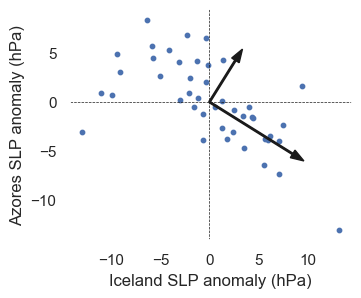

In [6]:
## plot the results
fig, ax = plt.subplots(figsize=(4, 3))

## add data
ax.scatter(slp_2d.sel(posn="Iceland"), slp_2d.sel(posn="Azores"), s=10)

## plot EOFs
arrow_kwargs = dict(x=0, y=0, width=0.15, head_width=0.9)

# 1st EOF
ax.arrow(
    dx=10 * model.components().isel(mode=0, posn=0),
    dy=10 * model.components().isel(mode=0, posn=1),
    color="k",
    **arrow_kwargs
)

# 2nd EOF
ax.arrow(
    dx=5 * model.components().isel(mode=1, posn=0),
    dy=5 * model.components().isel(mode=1, posn=1),
    color="k",
    **arrow_kwargs
)

## plot axes
ax.axvline(0, c="k", ls="--", lw=0.5)
ax.axhline(0, c="k", ls="--", lw=0.5)

## label plot
ax.set_aspect("equal")
ax.set_xlabel("Iceland SLP anomaly (hPa)")
ax.set_ylabel("Azores SLP anomaly (hPa)")
plt.show()

### Full spatial field

Compute EOFs

In [7]:
## compute eofs
model = xe.single.EOF(use_coslat=True, n_modes=10)
model.fit(slp_anom, dim="time")

## extract eofs and principal component timeseries ('pcs') for convenience
eofs = model.components()
pcs = model.scores()

## check that we can obtain 'pcs' using model.transform function
print(np.allclose(pcs, model.transform(slp_anom)))

True


Plot spatial pattern

In [ ]:
fig = plt.figure(figsize=(7, 5))
fig, ax = plot_setup_atlantic(fig)

ax.pcolormesh(
    eofs.longitude,
    eofs.latitude,
    eofs.isel(mode=0),
    transform=ccrs.PlateCarree(),
    cmap="cmo.balance",
    vmax=0.03,
    vmin=-0.03,
)

plt.show()

Plot timeseries

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

## plot the data
ax.plot(pcs.time.dt.year, pcs.isel(mode=0))

## label
ax.set_ylabel("Score (unitless)")
ax.set_xlabel("Year")

plt.show()

Explained variance ratio

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

## plot the data
ax.bar(model.explained_variance_ratio().mode, model.explained_variance_ratio())

## label
ax.set_ylabel("Fraction")
ax.set_xlabel("Mode #")
ax.set

plt.show()